In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import xlsxwriter

In [50]:
# Load data into a pandas DataFrame
file_path = r'C:\Users\siris\Downloads\Nutrition.xlsx'
df = pd.read_excel(file_path)

selected_columns = ['hashtag', 'viewsCount', 'likesCount', 'commentsCount', 'sharesCount', 'text']
df_selected = df[selected_columns]
print(df_selected)
with pd.ExcelWriter("Nutrition_cleaned.xlsx") as writer:
    df_selected.to_excel(writer)

                  hashtag  viewsCount  likesCount  commentsCount  sharesCount  \
0    WholeFoodSupplements         NaN          16              0            0   
1    WholeFoodSupplements         NaN          19             11            0   
2    WholeFoodSupplements         NaN           8              0            0   
3    WholeFoodSupplements         NaN         225              0            0   
4    WholeFoodSupplements         NaN          24              9            1   
..                    ...         ...         ...            ...          ...   
595       CognitiveHealth         1.0           1              1            1   
596       CognitiveHealth         7.0           0              0            0   
597       CognitiveHealth         1.0           1              1            0   
598       CognitiveHealth         NaN          20              7           18   
599       CognitiveHealth         NaN           1              1            1   

                           

In [51]:
views_summary = df_selected['viewsCount'].describe()
likes_summary = df_selected['likesCount'].describe()
comments_summary = df_selected['commentsCount'].describe()
shares_summary = df_selected['sharesCount'].describe()

print("Views Summary:\n", views_summary)
print("Likes Summary:\n", likes_summary)
print("Comments Summary:\n", comments_summary)
print("Shares Summary:\n", shares_summary)

Views Summary:
 count    2.350000e+02
mean     9.980820e+04
std      2.943149e+05
min      1.000000e+00
25%      7.350000e+01
50%      1.680000e+03
75%      3.916350e+04
max      2.691997e+06
Name: viewsCount, dtype: float64
Likes Summary:
 count       600.000000
mean       1939.226667
std       11300.197329
min           0.000000
25%           3.000000
50%          29.000000
75%         108.250000
max      147992.000000
Name: likesCount, dtype: float64
Comments Summary:
 count     600.000000
mean       52.686667
std       254.346224
min         0.000000
25%         0.000000
50%         1.000000
75%         9.000000
max      3557.000000
Name: commentsCount, dtype: float64
Shares Summary:
 count      600.000000
mean       340.236667
std       1985.465117
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max      27327.000000
Name: sharesCount, dtype: float64


In [52]:
# Aggregate data by 'tags'
tag_aggregated_data = df_selected.groupby('hashtag').agg({
    'viewsCount': 'sum',
    'likesCount': 'sum',
    'sharesCount': 'sum',
    'commentsCount': 'sum'
}).reset_index()

print(tag_aggregated_data)

tag_aggregated_data['hashtag'] = pd.Categorical(tag_aggregated_data['hashtag'])

                hashtag  viewsCount  likesCount  sharesCount  commentsCount
0           CoffeeFruit       160.0        6146           20             17
1       CognitiveHealth    410631.0       22335         3658           1116
2      FitnessNutrition    272461.0       10075         1219            628
3          HealthyAging   5687579.0      198534        22135           7396
4             Longevity  17082629.0      920207       177093          22386
5  WholeFoodSupplements      1468.0        6239           17             69


In [53]:
# Comments Count
plt.figure(figsize=(12,10))
sns.barplot(x='hashtag', y='commentsCount', data=tag_aggregated_data)
plt.title('Comments Count by Tags')
plt.xticks(rotation=30)
plt.savefig('comments_count_by_tags.png')
plt.clf()
# Likes Count
plt.figure(figsize=(12,10))
sns.barplot(x='hashtag', y='likesCount', data=tag_aggregated_data)
plt.title('Likes Count by Tags')
plt.xticks(rotation=30)
plt.savefig('likes_count_by_tags.png')
plt.clf()

# Shares Count
plt.figure(figsize=(12,10))
sns.barplot(x='hashtag', y='sharesCount', data=tag_aggregated_data)
plt.title('Shares Count by Tags')
plt.xticks(rotation=30)
plt.savefig('shares_count_by_tags.png')
plt.clf()
# Views Count
plt.figure(figsize=(12,10))
sns.barplot(x='hashtag', y='viewsCount', data=tag_aggregated_data)
plt.title('Views Count by Tags')
plt.xticks(rotation=30)
plt.savefig('views_count_by_tags.png')
plt.clf()


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [54]:
text = " ".join(df_selected['text'].astype(str).tolist())
print(text)

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print(sentiment)


blob = TextBlob(text)
sentiment1 = blob.sentiment
print(f"Polarity: {sentiment1.polarity}, Subjectivity: {sentiment1.subjectivity}")


nan My ECZEMA journey
- 1.5 months since I started these wholefood supplements. I noticed an improvement after the first couple of weeks actually, but was sceptical and wanting to see whether it was going to continue like it did for Adam's cousin's eczema. 
As I'd heard and seen how these products can help improve people's general health (skin, energy, sleep quality, mental clarity/brain fog, weight and overall immunity), I was also sceptical about the whole thing. I couldn't just recommend it to people only based off of other people's results, so I initially felt I had to wait to see if I genuinely noticed any improvement in my health. Then still didn't want to put myself out there to share it with others when I did start to see changes, as I didn't want to annoy my facebook/instagram friends. 

But dammit, now that I'm already seeing big improvements in my skin (eczema and acne), less sugar cravings AND less PMS symptoms; I friggin can't not share share my experience with these produ

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\siris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.044, 'neu': 0.734, 'pos': 0.222, 'compound': 1.0}
Polarity: 0.21795383140518623, Subjectivity: 0.5007632988198227


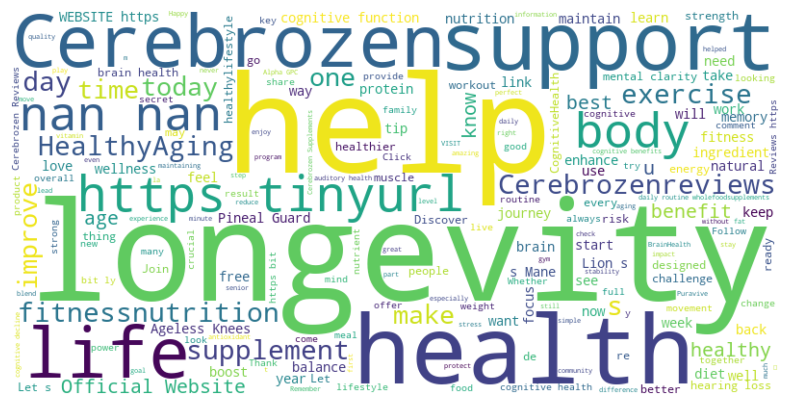

<Figure size 640x480 with 0 Axes>

In [55]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_Nutrition.jpg')
wordcloud_file = 'wordcloud_Nutrition.jpg'
wordcloud.to_file(wordcloud_file)

plt.clf()

In [56]:
with pd.ExcelWriter('Nutrition_Analysis.xlsx', engine='xlsxwriter') as writer:
    df_selected.to_excel(writer, sheet_name='Data', index=False)
    tag_aggregated_data.to_excel(writer, sheet_name='Aggregated Data', index=False)
    
    workbook = writer.book
    summary_sheet = workbook.add_worksheet('Summary')
    images_sheet = workbook.add_worksheet('Images')
    images1_sheet = workbook.add_worksheet('Wordcloud')
    
    
    
    
    # Write summary statistics to the Summary sheet
    summary_sheet.write('A1', 'Views Summary')
    for idx, value in enumerate(views_summary.index.values):
        summary_sheet.write(idx + 1, 0, value)
        summary_sheet.write(idx + 1, 1, views_summary[value])
    
    summary_sheet.write('A10', 'Likes Summary')
    for idx, value in enumerate(likes_summary.index.values):
        summary_sheet.write(idx + 11, 0, value)
        summary_sheet.write(idx + 11, 1, likes_summary[value])
    
    summary_sheet.write('A19', 'Comments Summary')
    for idx, value in enumerate(comments_summary.index.values):
        summary_sheet.write(idx + 20, 0, value)
        summary_sheet.write(idx + 20, 1, comments_summary[value])
    
    summary_sheet.write('A28', 'Shares Summary')
    for idx, value in enumerate(shares_summary.index.values):
        summary_sheet.write(idx + 29, 0, value)
        summary_sheet.write(idx + 29, 1, shares_summary[value])
    
    # Write sentiment analysis results to the Summary sheet
    summary_sheet.write('C1', 'Sentiment Analysis')
    summary_sheet.write('C2', 'VADER Sentiment')
    for idx, (key, value) in enumerate(sentiment.items()):
        summary_sheet.write(idx + 3, 2, key)
        summary_sheet.write(idx + 3, 3, value)
    
    summary_sheet.write('H1', 'TextBlob Sentiment')
    summary_sheet.write('H2', 'Polarity')
    summary_sheet.write('H3', sentiment1.polarity)
    summary_sheet.write('H4', 'Subjectivity')
    summary_sheet.write('H5', sentiment1.subjectivity)
    
    # Insert images into the Images sheet
    images_sheet.insert_image('A1', 'comments_count_by_tags.png')
    images_sheet.insert_image('A51', 'likes_count_by_tags.png')
    images_sheet.insert_image('A101', 'shares_count_by_tags.png')
    images_sheet.insert_image('A151', 'views_count_by_tags.png')
    images1_sheet.insert_image('A1', wordcloud_file)